In [1]:
import numpy as np
from data.BS_Theoretical import BS_Theoretical_Value as BS

In [2]:
def get_sigma(S, S_low, sigma_low, S_high, sigma_high):
    return sigma_low + (sigma_high - sigma_low) * (S - S_low) / (S_high - S_low)

In [3]:
n = 25
# 从1000-1700均匀取25个数
S_set = np.linspace(1000, 1700, n)

sigma_1000 = 0.2  # 当 X = 1000 时的波动率
sigma_1700 = 0.4  # 当 X = 1700 时的波动率

# 生成波动率序列
sigma_set = [get_sigma(S, 1000, sigma_1000, 1700, sigma_1700) for S in S_set]

S_set, sigma_set

(array([1000.        , 1029.16666667, 1058.33333333, 1087.5       ,
        1116.66666667, 1145.83333333, 1175.        , 1204.16666667,
        1233.33333333, 1262.5       , 1291.66666667, 1320.83333333,
        1350.        , 1379.16666667, 1408.33333333, 1437.5       ,
        1466.66666667, 1495.83333333, 1525.        , 1554.16666667,
        1583.33333333, 1612.5       , 1641.66666667, 1670.83333333,
        1700.        ]),
 [0.2,
  0.20833333333333337,
  0.21666666666666665,
  0.225,
  0.23333333333333336,
  0.24166666666666667,
  0.25,
  0.25833333333333336,
  0.26666666666666666,
  0.275,
  0.2833333333333334,
  0.29166666666666674,
  0.30000000000000004,
  0.30833333333333335,
  0.3166666666666667,
  0.325,
  0.33333333333333337,
  0.34166666666666673,
  0.35,
  0.3583333333333334,
  0.3666666666666667,
  0.375,
  0.38333333333333336,
  0.3916666666666667,
  0.4])

生成理论测试数据

In [4]:
result_BS = []
# 生成对应的期权价格
for i in range(len(S_set)):
    S = S_set[i]
    result_BS.append([S, BS(ST=1365, T=30, r=0.045, d=0.025, sigma=sigma_set[i], X=S)])

result_BS

[[1000.0, 365.889884056289],
 [1029.1666666666667, 336.8309081564271],
 [1058.3333333333333, 307.7722115328427],
 [1087.5, 278.71668473873706],
 [1116.6666666666667, 249.68257236244835],
 [1145.8333333333333, 220.74305861601943],
 [1175.0, 192.09854609149352],
 [1204.1666666666667, 164.1455835031186],
 [1233.3333333333333, 137.4761018064321],
 [1262.5, 112.77496217313137],
 [1291.6666666666667, 90.65784578997602],
 [1320.8333333333335, 71.53048769943632],
 [1350.0, 55.52605317497603],
 [1379.1666666666667, 42.52548951939559],
 [1408.3333333333335, 32.2294529072351],
 [1437.5, 24.24355528964253],
 [1466.6666666666667, 18.150601396209595],
 [1495.8333333333335, 13.559253355695375],
 [1525.0, 10.129773499012344],
 [1554.1666666666667, 7.5826107636630695],
 [1583.3333333333335, 5.696391884885841],
 [1612.5, 4.300612084438768],
 [1641.6666666666667, 3.2665473045358624],
 [1670.8333333333335, 2.4983818964208453],
 [1700.0, 1.9254795532125186]]

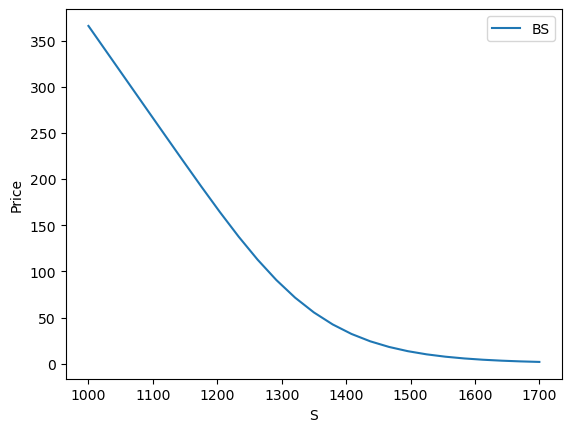

In [5]:
# 绘制图像
import matplotlib.pyplot as plt

plt.plot(S_set, [r[1] for r in result_BS], label='BS')
plt.xlabel('S')
plt.ylabel('Price')
plt.legend()
plt.show()

设置非参数模型优化问题

In [6]:
C_obs = np.array([r_bs[1] for r_bs in result_BS])
X = np.array([r_bs[0] for r_bs in result_BS])
sigma_0 = 0.2
ST = 1365
T = 30
tau = T / 365
r = 0.045
d = 0.025
# 优化参数
mu = np.random.uniform(low=7.107, high=7.265, size=(n + 1))
pi = np.ones(n + 1) / (n + 1)

In [7]:
from modules.BS_MixG_model import C_MixG

C_pred = (C_MixG(X, r, tau, sigma_0, mu, pi))

In [11]:
print(C_obs)

[365.88988406 336.83090816 307.77221153 278.71668474 249.68257236
 220.74305862 192.09854609 164.1455835  137.47610181 112.77496217
  90.65784579  71.5304877   55.52605317  42.52548952  32.22945291
  24.24355529  18.1506014   13.55925336  10.1297735    7.58261076
   5.69639188   4.30061208   3.2665473    2.4983819    1.92547955]


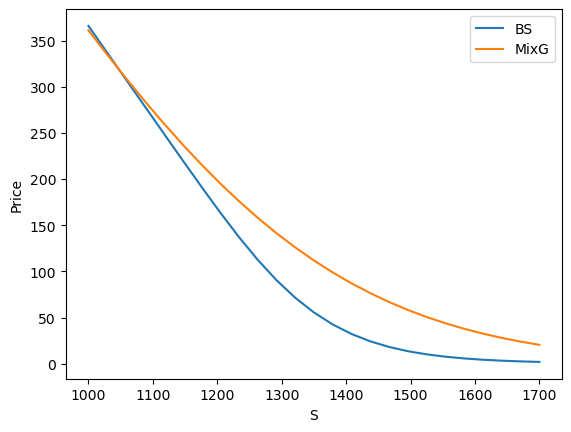

In [8]:
# 绘制图像BS和混合模型的对比
plt.plot(S_set, C_obs, label='BS')
plt.plot(S_set, C_pred, label='MixG')
plt.xlabel('S')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
# 计算误差
loss = np.mean(np.abs(C_obs - C_pred))
loss

32.059895710699045